<a href="https://colab.research.google.com/github/conormooney98/NBA-Predictive-Analytics/blob/main/NN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Model

##Importing the libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

##Importing the dataset

In [2]:
dataset = pd.read_csv("NBAdata5new.csv")

In [3]:
dataset.columns

Index(['TEAM', 'Date', 'WL', 'HA', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
       'PF', 'PTS', '+/-'],
      dtype='object')

In [4]:
# Data pre-processing and selection

X=dataset.drop(labels=['WL','TEAM','Date', '+/-', 'FTM', '3PA', 'PF', 'FTM', '3PM', 'OREB'], axis=1).values
y = dataset["WL"].values

In [5]:
#Also, we normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [6]:
#We split our dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 14) (400,)
Test set: (100, 14) (100,)


In [7]:
from sklearn.neural_network import MLPClassifier
import itertools

alpha=0.1

NN = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
yhat = NN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [8]:
#import evaluation metrics and call results
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
auc = accuracy_score(y_test, yhat)
precision=precision_score(y_test, yhat)
recall=recall_score(y_test, yhat)
f1= f1_score(y_test, yhat)
print("Alpha:",alpha )
print("Accuracy :", round(auc,2) )
print("Precision :", round(precision,2))
print("Recall :", round(recall,2))
print("F1 :", round(f1, 2))

Alpha: 0.1
Accuracy : 0.82
Precision : 0.9
Recall : 0.72
F1 : 0.8


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[36 14]
 [ 4 46]]


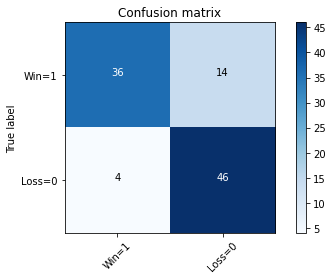

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Win=1','Loss=0'],  title='Confusion matrix')

In [11]:
#Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

alpha_range = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.9]
mean_acc=np.zeros((len(alpha_range)))
std_acc=np.zeros((len(alpha_range)))
cv = KFold(n_splits=5, random_state=1, shuffle=True)

mean_acc=np.zeros((len(alpha_range)))
std_acc=np.zeros((len(alpha_range)))
ConfustionMx=[];
i = 0
for alpha in alpha_range:
    classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(5, 2), random_state=1)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_acc[i]= mean(scores)
    std_acc[i]= std(scores)
    i = i + 1

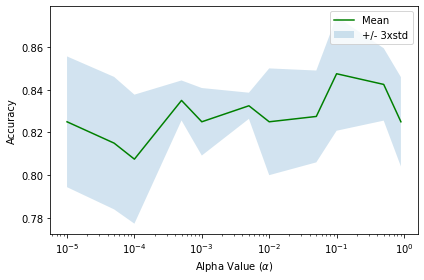

In [12]:
#Lets visualize what we have done
plt.plot(alpha_range, mean_acc,'g')
plt.fill_between(alpha_range, mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.2)
plt.legend(('Mean', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel(r'Alpha Value ($\alpha$)')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [13]:
print(mean_acc)

[0.82 0.82 0.81 0.83 0.82 0.83 0.82 0.83 0.85 0.84 0.82]
